In [1]:
import pandas as pd
import os
import numpy as np
import glob
import glob2
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter

# %matplotlib notebook

## Delete all files that begin at 2018

In [2]:
workspace = os.path.join("..", "data", "precip", "NCDC", "output_stations")
stations = []

for file in glob.glob(os.path.join("..", "data", 'precip', 'NCDC', 'output_stations', "*.csv")):
    df=pd.read_csv(file)
    if df['DATE'][0].startswith("2018"):
        os.remove(file) 

station_names = os.listdir(workspace)
station_names = [item.replace('.csv', '') for item in station_names if item.startswith("US")]

for station in station_names:
    stations.append(station)

In [3]:
comal = pd.read_csv(os.path.join("..", "data", "merged_output", "Comal_J17_J27.csv"))
comal.set_index(pd.to_datetime(comal['datetime']), inplace=True)
comal.head()

,datetime,Comal River,Comal Rv (nc),Comal Rv (oc),springflow,MaxLevel_J17,MaxLevel_J27
datetime,,,,,,,
2014-05-06,2014-05-06,116.0,61.9,50.7,118.0,632.095,830.749
2014-05-07,2014-05-07,116.0,54.1,50.1,116.0,631.673,830.637
2014-05-08,2014-05-08,113.0,52.2,51.3,115.0,631.839,830.498
2014-05-09,2014-05-09,118.0,54.1,52.6,115.0,632.492,830.361
2014-05-10,2014-05-10,113.0,52.2,53.2,116.0,633.265,830.352


In [4]:
df = pd.read_csv(os.path.join("..", "data", "precip", "NCDC", "output_stations", "US1TXGS0039.csv"))
df.set_index(pd.to_datetime(df['DATE']), inplace=True)
df.head()

,Unnamed: 0,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,MDPR,PRCP,TMAX,TMIN
DATE,,,,,,,,,,,,
2012-10-25,18572,US1TXGS0039,"HARPER 4.9 N, TX US",30.3711,-99.2528,659.6,2012-10-25,NaN,NaN,0.00,NaN,NaN
2012-10-26,18573,US1TXGS0039,"HARPER 4.9 N, TX US",30.3711,-99.2528,659.6,2012-10-26,NaN,NaN,0.00,NaN,NaN
2012-10-27,18574,US1TXGS0039,"HARPER 4.9 N, TX US",30.3711,-99.2528,659.6,2012-10-27,NaN,NaN,0.17,NaN,NaN
2012-10-28,18575,US1TXGS0039,"HARPER 4.9 N, TX US",30.3711,-99.2528,659.6,2012-10-28,NaN,NaN,0.00,NaN,NaN
2012-10-29,18576,US1TXGS0039,"HARPER 4.9 N, TX US",30.3711,-99.2528,659.6,2012-10-29,NaN,NaN,0.00,NaN,NaN


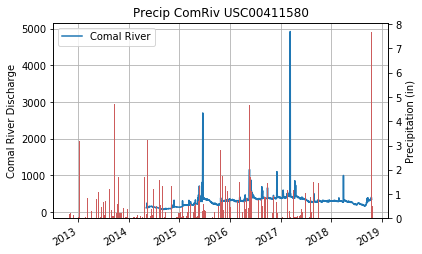

In [5]:
years = YearLocator()  
yearsFmt = DateFormatter('%Y')

fig, ax = plt.subplots()

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.autoscale_view()

df['DATE'] = pd.to_datetime(df['DATE'])
x = df['DATE']
y = df['PRCP']
x1 = comal.index
y1 = comal['MaxLevel_J17']
x2 = comal.index
y2 = comal['Comal River']

ax2 = ax.twinx()
ax2.bar(df.index, df['PRCP'], width=5, facecolor='indianred', label="Precipitation")
ax2.set_xlabel("Date")
ax2.set_ylabel("Precipitation (in)");
# ax2.set_xlabel("Date")

ax.plot(x2, y2, label="Comal River")
ax.set_ylabel("Comal River Discharge");
ax.set_title(f"Precip ComRiv {station}")
ax.legend()
ax.grid()
fig.autofmt_xdate()

# plt.savefig(os.path.join("..", "img", ""))

In [6]:
comal = pd.read_csv(os.path.join("..", "data", "merged_output", "Comal_J17_J27.csv"))
comal.set_index(pd.to_datetime(comal['datetime']), inplace=True)
comal.head()

for station in stations:
    
    df = pd.read_csv(os.path.join("..", "data", "precip", "NCDC", "output_stations", station+".csv"))
    df.set_index(pd.to_datetime(df['DATE']), inplace=True)
    
    years = YearLocator()  
    yearsFmt = DateFormatter('%Y')
#     fig, ax = plt.subplots()

#     ax.xaxis.set_major_locator(years)
#     ax.xaxis.set_major_formatter(yearsFmt)
#     ax.autoscale_view()

#     df['DATE'] = pd.to_datetime(df['DATE'])
#     x = df['DATE']
#     y = df['PRCP']
#     x1 = comal.index
#     y1 = comal['MaxLevel_J17']
#     x2 = comal.index
#     y2 = comal['Comal River']

#     ax2 = ax.twinx()
#     ax2.bar(df.index, df['PRCP'], width=5, facecolor='indianred', label="Precipitation")
#     ax2.set_xlabel("Date")
#     ax2.set_ylabel("Precipitation (in)");

#     ax.plot(x2, y2, label="Comal River")
#     ax.set_ylabel("Comal River");
#     ax.set_title(f"ComalRiver - Precip {station}")
#     ax.legend()
#     ax.grid()
#     fig.autofmt_xdate()
#     plt.savefig(os.path.join("..", "img", f"precip_{station}.png"))
    
    months = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 16, 18, 
              20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 
              42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 70, 80, 90, 100, 
              120, 140, 160, 180, 200, 220, 240, 260, 280, 300]
    
    for month in months:
        df = df.shift(month)
        corr_coeff_J17 = df['PRCP'].corr(comal['MaxLevel_J17'])
        corr_coeff_J27 = df['PRCP'].corr(comal['MaxLevel_J27'])
        corr_coeff_ComRv = df['PRCP'].corr(comal['Comal River'])
        corr_coeff_ComRvnc = df['PRCP'].corr(comal['Comal Rv (nc)'])
        corr_coeff_ComRvoc = df['PRCP'].corr(comal['Comal Rv (oc)'])

        if corr_coeff_J17 >= 0.2:
            print(f"J17 {month},", corr_coeff_J17, station)
        elif corr_coeff_J27 >= 0.2:
            print(f"J27 {month},", corr_coeff_J27, station)
        elif corr_coeff_ComRv >= 0.2:
            print(f"ComRv {month},", corr_coeff_ComRv, station)
        elif corr_coeff_ComRvnc >= 0.2:
            print(f"ComRv (nc) {month},", corr_coeff_ComRvnc, station)
        elif corr_coeff_ComRvoc >= 0.2:
            print(f"ComRv (oc) {month},", corr_coeff_ComRvoc, station)

ComRv 260, 0.20323335306655005 USC00413614
ComRv 70, 0.22184002646652165 US1TXKR0079
ComRv 260, 0.24963481289378323 US1TXGS0018
ComRv 42, 0.23908934801194362 USC00418877
ComRv 180, 0.23298678945318602 US1TXKN0012
ComRv 80, 0.21484366481950065 US1TXKR0074
J17 140, 0.20577674734592 US1TXKR0065
ComRv (oc) 12, 0.20888927938732438 US1TXGS0039
J17 0, 0.3155930046671004 US1TXGS0038
J17 1, 0.35034788427989294 US1TXGS0038
J17 2, 0.3851748080275084 US1TXGS0038
J17 3, 0.3612753687824194 US1TXGS0038
J17 4, 0.3931868900746672 US1TXGS0038
J17 5, 0.34236196387061735 US1TXGS0038
J17 6, 0.3249523989846671 US1TXGS0038
J17 7, 0.33471831336822994 US1TXGS0038
J17 8, 0.3234589048228635 US1TXGS0038
J17 9, 0.33502514970451813 US1TXGS0038
J17 10, 0.3481257762463369 US1TXGS0038
J17 11, 0.2866762754404626 US1TXGS0038
J17 12, 0.2551255753432589 US1TXGS0038
J17 14, 0.25154868382361845 US1TXGS0038
J17 16, 0.20115731182520333 US1TXGS0038
J27 18, 0.25270946444072767 US1TXGS0038
ComRv 22, 0.251794592505584 USC00414605